# Importing the relavant libraries.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

import nltk
import re
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
print("TensorFlow version:", tf.__version__)
from keras import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional




nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('punkt')

from sklearn.model_selection import train_test_split
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.linear_model import LogisticRegression 

# from sklearn.metrics import accuracy_score
# from sklearn.metrics import classification_report
# from sklearn.metrics import confusion_matrix
# from sklearn.metrics import precision_score


from wordcloud import WordCloud,STOPWORDS

from imblearn.over_sampling import SMOTE

[nltk_data] Downloading package wordnet to C:\Users\Keshan
[nltk_data]     Pathirana\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


TensorFlow version: 2.11.0


[nltk_data] Downloading package stopwords to C:\Users\Keshan
[nltk_data]     Pathirana\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Keshan
[nltk_data]     Pathirana\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
#Reading the data.
df = pd.read_csv("./Dataset/tripadvisor_hotel_reviews.csv")

In [4]:
#Checking the dataframe.
df.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


In [5]:
#Dataframe shape
df.shape

(20491, 2)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20491 entries, 0 to 20490
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  20491 non-null  object
 1   Rating  20491 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 320.3+ KB


In [7]:
df.nunique()

Review    20491
Rating        5
dtype: int64

In [8]:
#Checking whether there are null values in the dataframe.
df.isnull().sum()

Review    0
Rating    0
dtype: int64

In [9]:
df.describe()

,Rating
count,20491.000000
mean,3.952223
std,1.233030
min,1.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,5.000000


# EDA

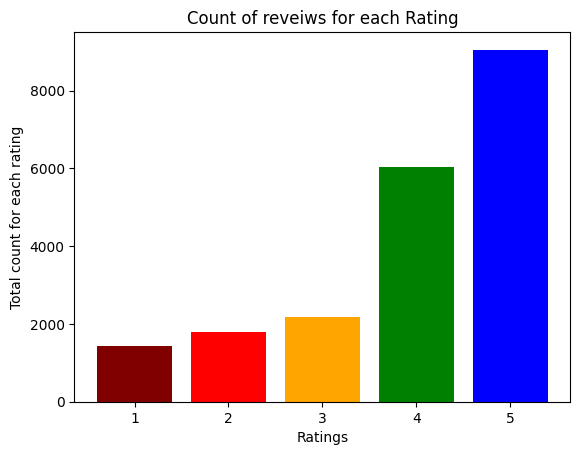

In [10]:
#Bar plot to represent the count for each rating in the dataframe
counter = df.Rating.value_counts()
index = counter.index
plt.figure(1)
plt.bar(index, counter, color = [ 'blue', 'green', 'orange', 'red', 'maroon' ])
plt.xlabel("Ratings")
plt.ylabel("Total count for each rating")
plt.title("Count of reveiws for each Rating")
plt.show()

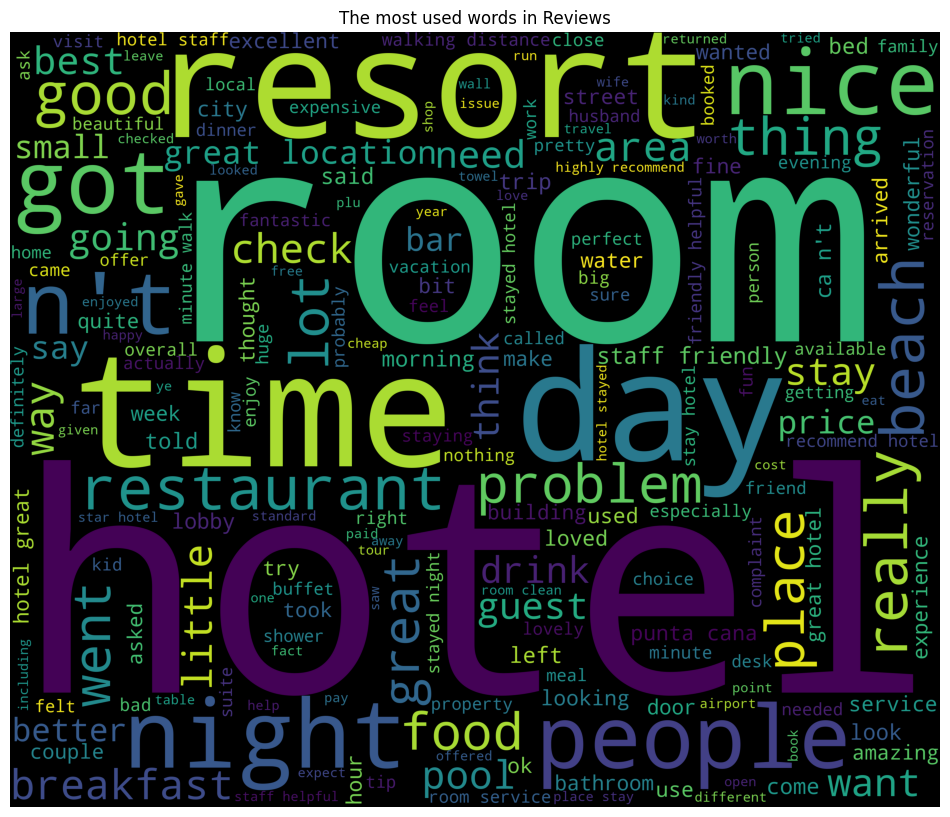

In [11]:
#Worldcloud to visualize the most used words in reviews.
wordcloud = WordCloud(background_color='black',
                      width=3000,
                      height=2500,
                      min_font_size = 10
                      ).generate(' '.join(df['Review'].values))

plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.title("The most used words in Reviews")
plt.show()

In [12]:
df.Review[0]

'nice hotel expensive parking got good deal stay hotel anniversary, arrived late evening took advice previous reviews did valet parking, check quick easy, little disappointed non-existent view room room clean nice size, bed comfortable woke stiff neck high pillows, not soundproof like heard music room night morning loud bangs doors opening closing hear people talking hallway, maybe just noisy neighbors, aveda bath products nice, did not goldfish stay nice touch taken advantage staying longer, location great walking distance shopping, overall nice experience having pay 40 parking night,  '

In [13]:
df['Review'].nunique()

20491

In [14]:
type(df['Review'])

pandas.core.series.Series

# Splitting data to training and testing

In [15]:
#Train test split
X = df['Review']
Y = df['Rating']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [16]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)
print(type(X_train))

(16392,)
(4099,)
(16392,)
(4099,)
<class 'pandas.core.series.Series'>


In [17]:
X_train.head()

11710    outstanding cleanliness value location wanted ...
10444    cheap cheerful hey not sure fuss picked hotel ...
19183    sensational hotel stayed hotel renew 2-10 nove...
14261    nice spent 3 nights easter nice little hotel f...
1989     overall good experience enjoyed staying hotel ...
Name: Review, dtype: object

In [18]:
X_train = pd.Series(X_train)
print(X_train.shape)
print(type(X_train))

(16392,)
<class 'pandas.core.series.Series'>


In [19]:
X_train.head()

11710    outstanding cleanliness value location wanted ...
10444    cheap cheerful hey not sure fuss picked hotel ...
19183    sensational hotel stayed hotel renew 2-10 nove...
14261    nice spent 3 nights easter nice little hotel f...
1989     overall good experience enjoyed staying hotel ...
Name: Review, dtype: object

# Processing the Reviews text data

In [20]:
def clean_text(text):
    
    #taking only letters
    text = re.sub("[^a-zA-Z]", " ", text)
    
    #Converting to lowercase
    text = text.lower()
    
    #Removing stop words 
    stop_words = stopwords.words('english')
    text_without_sw = " ".join([j for j in text.split() if j not in stop_words]) 
    
    lemmatizer = WordNetLemmatizer()
    text_cleaned = " ".join([lemmatizer.lemmatize(word) for word in text_without_sw.split()])

    #joining
    return text_cleaned

In [21]:
# df['cleaned_text'] = df['Review'].apply(clean_text)
# df.head()

In [22]:
X_train = X_train.apply(clean_text)
X_train.head()
print(X_train.shape)
print(type(X_train))

(16392,)
<class 'pandas.core.series.Series'>


In [23]:
X_train.head()

11710    outstanding cleanliness value location wanted ...
10444    cheap cheerful hey sure fuss picked hotel pric...
19183    sensational hotel stayed hotel renew november ...
14261    nice spent night easter nice little hotel frie...
1989     overall good experience enjoyed staying hotel ...
Name: Review, dtype: object

# Tokenization and Padding

In [24]:
tokenizer = Tokenizer(num_words = 1000, oov_token = "oov")
tokenizer.fit_on_texts(X_train)

word_index = tokenizer.word_index


In [25]:
maxlen = 100

In [26]:
training_sequences = tokenizer.texts_to_sequences(X_train)
training_padded = pad_sequences(training_sequences, padding = 'post', maxlen = maxlen)
training_padded.shape

(16392, 100)

In [27]:
testing_sequences = tokenizer.texts_to_sequences(X_test)
testing_padded = pad_sequences(testing_sequences, padding = 'post', maxlen = maxlen)
testing_padded.shape

(4099, 100)

In [28]:
num_classes = 6 

Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)
print(Y_train.shape)

(16392, 6)


In [29]:
Y_train = Y_train[: , 1:]
Y_test = Y_test[: , 1:]

In [30]:
X_train= np.array(training_padded).reshape((training_padded.shape[0],training_padded.shape[1], 1))
X_test = np.array(testing_padded).reshape((testing_padded.shape[0],testing_padded.shape[1], 1))
print(X_train.shape)
print(X_test.shape)

(16392, 100, 1)
(4099, 100, 1)


# Building the model and fitting

In [31]:
max_len = 100

embedding_size=32

model=Sequential()

model.add(Embedding(1000, embedding_size, input_length=maxlen))

model.add(Bidirectional(LSTM(100, input_shape = (max_len, 1), return_sequences = True, activation = 'tanh')))

model.add(Bidirectional(LSTM(100)))

model.add(Dense(32, activation = 'tanh'))

model.add(Dense(5, activation = 'softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 32)           32000     
                                                                 
 bidirectional (Bidirectiona  (None, 100, 200)         106400    
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 200)              240800    
 nal)                                                            
                                                                 
 dense (Dense)               (None, 32)                6432      
                                                                 
 dense_1 (Dense)             (None, 5)                 165       
                                                                 
Total params: 385,797
Trainable params: 385,797
Non-trai

In [32]:
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)
model.compile(loss = 'categorical_crossentropy', optimizer = optimizer, metrics = ['accuracy'])

In [33]:
model.fit(X_train, Y_train, epochs = 7, validation_data = (X_test, Y_test))

Epoch 1/7
513/513 [==============================] - 165s 310ms/step - loss: 1.0816 - accuracy: 0.5190 - val_loss: 1.0233 - val_accuracy: 0.5528
Epoch 2/7
513/513 [==============================] - 151s 294ms/step - loss: 0.9035 - accuracy: 0.5981 - val_loss: 0.9392 - val_accuracy: 0.6011
Epoch 3/7
513/513 [==============================] - 169s 330ms/step - loss: 0.8601 - accuracy: 0.6222 - val_loss: 0.9214 - val_accuracy: 0.6099
Epoch 4/7
513/513 [==============================] - 215s 420ms/step - loss: 0.8323 - accuracy: 0.6327 - val_loss: 0.9485 - val_accuracy: 0.6021
Epoch 5/7
513/513 [==============================] - 352s 686ms/step - loss: 0.8068 - accuracy: 0.6474 - val_loss: 0.9245 - val_accuracy: 0.6055
Epoch 6/7
513/513 [==============================] - 422s 822ms/step - loss: 0.7842 - accuracy: 0.6543 - val_loss: 0.9590 - val_accuracy: 0.5943
Epoch 7/7
513/513 [==============================] - 345s 673ms/step - loss: 0.7606 - accuracy: 0.6645 - val_loss: 0.9756 - val_ac

# Testing the model

In [34]:
text = [df.Review[0]]
# text = ['The service was very bad at the hotel, the worst experience ive ever had very bad']
print(type(text))
text = tokenizer.texts_to_sequences(text)
text = pad_sequences(text, padding = 'post', maxlen = maxlen)

text= np.array(text).reshape((text.shape[0],text.shape[1], 1))

prediction = model.predict(text)
print(prediction)
print(np.argmax(prediction) + 1)

<class 'list'>
1/1 [==============================] - 5s 5s/step
[[5.1191490e-04 1.1172050e-02 1.9084927e-01 7.1315652e-01 8.4310219e-02]]
4


In [35]:
scores = model.evaluate(X_test, Y_test, verbose=0)
print('Test accuracy:', scores[1])

Test accuracy: 0.6047816276550293


# Creating a Pickle file

In [36]:
pickle.dump(model, open('RNN_model.pkl', 'wb'))

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers\bidirectional
......vars
...layers\bidirectional\backward_layer
......vars
...layers\bidirectional\backward_layer\cell
......vars
.........0
.........1
.........2
...layers\bidirectional\forward_layer
......vars
...layers\bidirectional\forward_layer\cell
......vars
.........0
.........1
.........2
...layers\bidirectional\layer
......vars
...layers\bidirectional\layer\cell
......vars
...layers\bidirectional_1
......vars
...layers\bidirectional_1\backward_layer
......vars
...layers\bidirectional_1\backward_layer\cell
......vars
.........0
.........1
.........2
...layers\bidirectional_1\forward_layer
......vars
...layers\bidirectional_1\forward_layer\cell
......vars
.........0
.........1
.........2
...layers\bidirectional_1\layer
......vars
...layers\bidirectional_1\layer\cell
......vars
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\embedding
......va

In [37]:
pickle.dump(tokenizer, open('tokenizer.pkl', 'wb'))

In [38]:
model = pickle.load(open('RNN_model.pkl', 'rb'))

Keras model archive loading:
File Name                                             Modified             Size
config.json                                    2023-02-25 14:21:10         4202
metadata.json                                  2023-02-25 14:21:10           64
variables.h5                                   2023-02-25 14:21:10      4691568
Keras weights file (<HDF5 file "variables.h5" (mode r)>) loading:
...layers\bidirectional
......vars
...layers\bidirectional\backward_layer
......vars
...layers\bidirectional\backward_layer\cell
......vars
.........0
.........1
.........2
...layers\bidirectional\forward_layer
......vars
...layers\bidirectional\forward_layer\cell
......vars
.........0
.........1
.........2
...layers\bidirectional\layer
......vars
...layers\bidirectional\layer\cell
......vars
...layers\bidirectional_1
......vars
...layers\bidirectional_1\backward_layer
......vars
...layers\bidirectional_1\backward_layer\cell
......vars
.........0
.........1
.........2
...layers\

In [ ]:
model.save_weights("weights.h5")

In [39]:
text = [df.Review[0]]
# text = ['The service was very bad at the hotel, the worst experience ive ever had very bad']
print(type(text))
text = tokenizer.texts_to_sequences(text)
text = pad_sequences(text, padding = 'post', maxlen = maxlen)

text= np.array(text).reshape((text.shape[0],text.shape[1], 1))
model.predict(text)
print(prediction)
print(np.argmax(prediction) + 1)

<class 'list'>
1/1 [==============================] - 3s 3s/step
[[5.1191490e-04 1.1172050e-02 1.9084927e-01 7.1315652e-01 8.4310219e-02]]
4
